In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from the CSV file
dataset = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
continentcsv = pd.read_csv('continent.csv')
df = pd.read_csv('heart_attack_prediction_dataset.csv')

names= pd.read_csv('/content/names.csv')


# New Section

Phase 1

In [ ]:
# List of columns to analyze

columns_to_analyze = [
    'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
    'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
    'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
    'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
    'Continent', 'Hemisphere', 'Heart Attack Risk'
]

# Create a dictionary to store information for each column
column_info = {'Name of data': [], 'Type of data': [], 'Range of data': [],
               'Min': [], 'Max': [], 'Mean': [], 'Mode': [], 'Median': [], 'Outliers': []}

# Analyze each column
for column_name in columns_to_analyze:
    column_data = dataset[column_name]
    data_type = column_data.dtype

    if pd.api.types.is_numeric_dtype(data_type):
        data_summary = column_data.describe()
        mode_value = column_data.mode().values[0]
        median_value = column_data.median()

        Q1 = column_data.quantile(0.25)
        Q3 = column_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]


        # Add information to the dictionary
        column_info['Name of data'].append(column_name)
        column_info['Type of data'].append(data_type)
        column_info['Range of data'].append(f"{column_data.min()} - {column_data.max()}")
        column_info['Min'].append(column_data.min())
        column_info['Max'].append(column_data.max())
        column_info['Mean'].append(data_summary['mean'])
        column_info['Mode'].append(mode_value)
        column_info['Median'].append(median_value)
        column_info['Outliers'].append(', '.join(map(str, outliers.tolist())))
    else:
        mode_value = column_data.mode().values[0]
        range_value = column_data.unique()
        # For non-numeric columns, provide some basic information
        column_info['Name of data'].append(column_name)
        column_info['Type of data'].append(data_type)
        column_info['Range of data'].append(range_value)
        column_info['Min'].append('Not applicable')
        column_info['Max'].append('Not applicable')
        column_info['Mean'].append('Not applicable')
        column_info['Mode'].append(mode_value)
        column_info['Median'].append('Not applicable')
        column_info['Outliers'].append('Not applicable')

# Create a table
table = {key: column_info[key] for key in column_info.keys()}

# Display the results in a table
print(tabulate(table, headers='keys', tablefmt='pretty'))


+---------------------------------+--------------+---------------------------------------------------------------------------+----------------+----------------+---------------------+---------------------+----------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

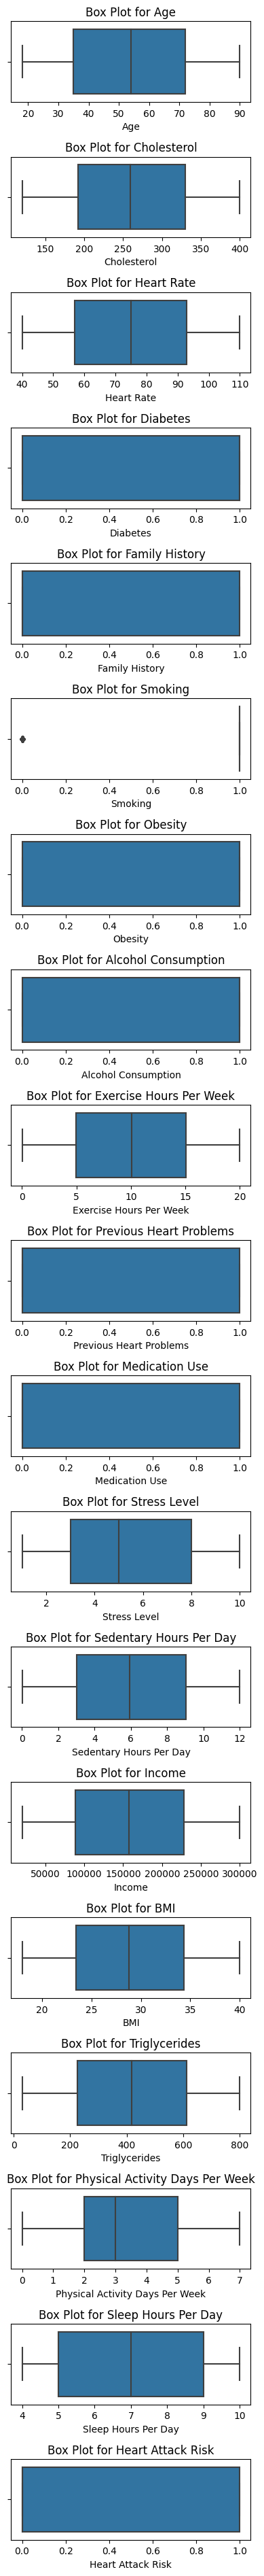

In [ ]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['number']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(4, 2 * len(numeric_columns)))

# Create box plots for each numeric column
for i, column_name in enumerate(numeric_columns):
    sns.boxplot(x=dataset[column_name], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column_name}')

# Adjust layout
plt.tight_layout()
plt.show()



Phase 1 part 3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Select relevant features
selected_features = ['Age', 'Exercise Hours Per Week', 'Physical Activity Days Per Week', 'Stress Level']

# Drop rows with missing values in selected features
df_selected = df[selected_features + ['Heart Attack Risk']].dropna()

# Define criteria for a healthy lifestyle (you can adjust these criteria)
healthy_criteria = ((df_selected['Age'] < 40) &
                    (df_selected['Exercise Hours Per Week'] >= 3) &
                    (df_selected['Physical Activity Days Per Week'] >= 4) &
                    (df_selected['Stress Level'] <= 3))

# Add a column indicating whether the person is living a healthy life
df_selected['Healthy Lifestyle'] = healthy_criteria.astype(int)

# Split the dataset into features and target
X = df_selected[selected_features]
y = df_selected['Healthy Lifestyle']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Add the 'Healthy Lifestyle' column to the original dataset based on 'df_selected' Patient IDs
# df['Healthy Lifestyle'] = df.set_index('Patient ID').loc[df_selected.set_index('Patient ID').index]['Healthy Lifestyle'].values
df['healthy_criteria']=healthy_criteria
print(df)
# Display the updated dataset
# print(df['healthy_criteria'].sum())


Accuracy: 0.9994295493439818
     Patient ID    Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0        kjreer   67.0    Male          208         158/88          72   
1       CZE1114  230.0    Male          389         165/93          98   
2       BNI9906   21.0       x          324         174/99          72   
3       JLN3497    NaN    Male          383        163/100          73   
4       ZOO7941   66.0    Male          318          91/88          93   
...         ...    ...     ...          ...            ...         ...   
8758    MSV9918   60.0    Male          121          94/76          61   
8759    QSV6764   28.0  Female          120        157/102          73   
8760    XKA5925   47.0    Male          250         161/75         105   
8761    EPE6801   36.0    Male          178         119/67          60   
8762    ZWN9666   25.0  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  Income        BMI  \
0     

Phase 2 Part 1

In [8]:
import re

# Create a table to store the results
table_data = []


# Validation function for 'Patient ID'
def validate_patient_id(patient_id):
    pattern = re.compile(r'^[A-Za-z]{3}\d{4}$')
    return bool(pattern.match(str(patient_id)))
# Check the uniqueness of 'Patient ID'
is_unique = df['Patient ID'].nunique() / len(df)
# Find non-unique 'Patient IDs'
non_unique_patient_ids = df[df.duplicated(subset='Patient ID', keep=False)]['Patient ID']
# Attribute: 'Patient ID'
column_name = 'Patient ID'
# Number of Data
num_data = len(df)
# Null
num_null = df[column_name].isnull().sum()
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_patient_id).sum() / num_data) * 100 if num_data > 0 else None
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Consistency (Uniqueness)
consistency = is_unique * 100
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%","-", f"{completeness:.2f}%", f"{consistency:.2f}%","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy", "Completeness", "Consistency","Currentness"])
# Display the result table using tabulate for a nice format
#print(tabulate(result_table, headers='keys', tablefmt='pretty'))
# Print non-unique 'Patient IDs'
#print("\nNon-unique Patient IDs:")
#print(non_unique_patient_ids)



# Validation function for 'Age'
def validate_age(age):
    return 0 <= age <= 150 if pd.notna(age) else None
# Attribute: 'Age'
column_name = 'Age'
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_age).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series = df['Age'].apply(lambda x: 0 <= x <= 150 if pd.notna(x) else None)
accuracy = accuracy_series.all()
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%", f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])
# Print rows where 'Age' does not match the criteria
#invalid_age_rows = df[~df['Age'].apply(validate_age)]
#print("\nRows where 'Age' does not match the criteria:")
#print(tabulate(invalid_age_rows, headers='keys', tablefmt='pretty'))



# Validation function for 'Sex'
def validate_sex(sex):
    return sex.lower() in ['male', 'female'] if pd.notna(sex) else None
# Attribute: 'Sex'
column_name = 'Sex'
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_sex).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series = df['Sex'].apply(lambda x: x.lower() in ['male', 'female'] if pd.notna(x) else None)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])
# Print rows where 'Sex' does not match the criteria
#invalid_sex_rows = df[~df['Sex'].apply(validate_sex)]
#print("\nRows where 'Sex' does not match the criteria:")
#print(tabulate(invalid_sex_rows, headers='keys', tablefmt='pretty'))


# Accurate function for 'Blood Pressure'
def accurate_blood_pressure(blood_pressure):
    if pd.notna(blood_pressure):
        parts = blood_pressure.split('/')
        if len(parts) == 2:
            try:
                x, y = map(int, parts)
                return x > y
            except ValueError:
                return False
    return False
# Validation function for 'Blood Pressure'
def validate_blood_pressure(blood_pressure):
    if pd.notna(blood_pressure):
        parts = blood_pressure.split('/')
        if len(parts) == 2:
           return True

    return False
# Attribute: 'Blood Pressure'
column_name = 'Blood Pressure'
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_blood_pressure).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series = df['Blood Pressure'].apply(accurate_blood_pressure)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%", f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])















column_names = ['Diabetes','Previous Heart Problems','Family History','Smoking','Obesity','Alcohol Consumption','Medication Use','Heart Attack Risk']

for column_name in column_names:
  def validate_pre(pre):
      return 0 <= pre <= 1 if pd.notna(pre) else None
  def accurate_pre(pre):
      return 0 <= pre <= 1 if pd.notna(pre) else None
  # Number of Data
  num_data = df[column_name].count()
  # Null
  num_null = df[column_name].isnull().sum()
  # Completeness
  completeness = (1 - (num_null / num_data)) * 100
  # Validity based on the specified pattern
  validity = (df[column_name].apply(validate_pre).sum() / num_data) * 100 if num_data > 0 else None
  # Accuracy
  accuracy_series =  df[column_name].apply(accurate_pre)
  # Accuracy Percentage
  accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
  # Append the results to the table_data list
  table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
  # Create a DataFrame from the table_data list
  result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])


def validate_str(pre):
    return 1 <= pre <= 10 if pd.notna(pre) else None
def accurate_str(pre):
    return 1 <= pre <= 10 if pd.notna(pre) else None
column_name = "Stress Level"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_str).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_str)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])



def validate_sed(pre):
    return 0 <= pre <= 24 if pd.notna(pre) else None
def accurate_sed(pre):
    return 0 <= pre <= 24 if pd.notna(pre) else None
column_name = "Sedentary Hours Per Day"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_sed).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_sed)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])




def validate_in(inc):
    return 0 <= inc if pd.notna(inc) else None
def accurate_in(inc):
    return 0 <= inc  if pd.notna(inc) else None
column_name = "Income"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_in).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_in)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])



def validate_bmi(bmi):
    return 0 <= bmi if pd.notna(bmi) else None
def accurate_bmi(bmi):
    return 9 <= bmi <= 105  if pd.notna(bmi) else None
column_name = "BMI"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_bmi).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_bmi)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])


def validate_T(bmi):
    return 0 <= bmi if pd.notna(bmi) else None
def accurate_T(bmi):
    return 0 <= bmi   if pd.notna(bmi) else None
column_name = "Triglycerides"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_T).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_T)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])


def validate_P(bmi):
    return 0 <= bmi <= 7 if pd.notna(bmi) else None
def accurate_P(bmi):
    return 0 <= bmi <= 7   if pd.notna(bmi) else None
column_name = "Physical Activity Days Per Week"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_P).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_P)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])


def validate_S(bmi):
    return 0 <= bmi <= 24 if pd.notna(bmi) else None
def accurate_S(bmi):
    return 0 <= bmi <= 24 if pd.notna(bmi) else None
column_name = "Sleep Hours Per Day"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_S).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_S)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])



def validate_C(bmi):
    return 0 <= len(bmi) <= 90   if pd.notna(bmi) else None
def accurate_C(bmi):
    return 3 <= len(bmi) <= 56 if pd.notna(bmi) else None
column_name = "Country"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_C).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_C)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])


def validate_con(bmi):
    return bmi in ['Europe', 'Australia' , 'Asia' , 'Africa' , 'North America' , 'South America'] if pd.notna(bmi) else None
def accurate_con(bmi):
    return bmi in ['Europe', 'Australia' , 'Asia' , 'Africa' , 'North America' , 'South America'] if pd.notna(bmi) else None
column_name = "Continent"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_con).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_con)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])




def validate_hem(bmi):
    return bmi in ['Northern Hemisphere', 'Southern Hemisphere'] if pd.notna(bmi) else None
def accurate_hem(bmi):
    return bmi in ['Northern Hemisphere', 'Southern Hemisphere'] if pd.notna(bmi) else None
column_name = "Hemisphere"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_hem).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_hem)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None

incc = 0
for index, row in df.iterrows():
    Continent = row['Continent']
    Country = row['Country']
    Hemisphere = row['Hemisphere']
    if Country == "United States" :
        # Multi source Schema level: Naming conflict
        Country = "US"
    if not (Hemisphere == "Southern Hemisphere" or Hemisphere == "Northern Hemisphere"):
        # Misspelling value for Hemisphere
        incc+=1
    if not (Continent == "South America" or Continent == "North America" or Continent == "Europe" or Continent == "Asia" or Continent == "Africa" or Continent == "Australia"):
        # Misspelling value for Continent
        incc+=1
    result = continentcsv[continentcsv['nation'] == Country]['continent'].values
    if len(result) > 0:
        if result != Continent:
            if result[0] == 'Oceania' and Continent=='Australia':
                # Multi source Schema level: Naming conflict
                 continue

            # Contradictory Data that have the same Country name but different Continent
            incc+=1
        if not ( (Continent == "South America" and Hemisphere == "Southern Hemisphere" ) or  (Continent == "North America" and Hemisphere == "Northern Hemisphere" ) or (Continent == "Europe" and Hemisphere == "Northern Hemisphere" ) or (Continent == "Asia"  and Hemisphere == "Northern Hemisphere" ) or (Continent == "Africa" and Hemisphere == "Southern Hemisphere" ) or (Continent == "Australia"  and Hemisphere == "Southern Hemisphere" ) ):
             # incorrect value for Hemisphere
             incc+=1
    else:
        # Country (main csv) is not in nation (continent csv)
        incc+=1


con_percentage = ((num_data - incc) / num_data) * 100 if num_data > 0 else None



# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%",f"{con_percentage:.2f}%","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])






# Display the result table using tabulate for a nice format
print(tabulate(result_table, headers='keys', tablefmt='pretty'))

# Print rows where 'Blood Pressure' does not match the criteria
#invalid_blood_pressure_rows = df[~df['Blood Pressure'].apply(validate_blood_pressure)]
#print("\nRows where 'Blood Pressure' does not match the criteria:")
#print(tabulate(invalid_blood_pressure_rows, headers='keys', tablefmt='pretty'))




+----+---------------------------------+----------------+------+----------+----------+--------------+-------------+-------------+
|    |      Name of the Attribute      | Number of Data | Null | Validity | Accuracy | Completeness | Consistency | Currentness |
+----+---------------------------------+----------------+------+----------+----------+--------------+-------------+-------------+
| 0  |           Patient ID            |      8763      |  0   |  99.93%  |    -     |   100.00%    |   99.98%    |      -      |
| 1  |               Age               |      8761      |  2   |  99.99%  |  99.99%  |    99.98%    |      -      |      -      |
| 2  |               Sex               |      8760      |  3   |  99.99%  |  99.99%  |    99.97%    |      -      |      -      |
| 3  |         Blood Pressure          |      8763      |  0   | 100.00%  |  95.08%  |   100.00%    |      -      |      -      |
| 4  |            Diabetes             |      8763      |  0   | 100.00%  | 100.00%  |   1

**Patient Id**  validity
  3 three letters and 4 digits
 Consistency
  unique
  **Age**
 validity   0 < Age
 accuracy   0 < x < 180
**Sex**  validity
  Male and Female **Cholesterol**
**Blood Pressure**
 validity   format x/y
  x>y**Diabetes Family-History Smoking  Obesity  Alcohol Consumption**
 validity   0-1
**Exercise Hours Per Week** validity
  0-168 Accuracy
  0-100**Diet**
 validity   Unhealthy - Average - Healthy
**Previous Heart Problems  Medication Use** validity
  0-1 **Stress Level**
 validity   1-10
**Sedentary** Hours Per Day
 validity   0-24
**income**  validity
  digits only
**BMI**  validity
  0 < x  Accuracy
  9 < x < 105
**Triglycerides** validity
  0 < x **Physical Activity Days Per Week**
 validity   0 <= x <= 7
**Sleep Hours Per Day** validity
  0 <= x <= 24
**Heart Attack Risk** validity
  0-1 x

In [ ]:
import pandas as pd
from tabulate import tabulate

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Select the numeric column for outlier removal
numeric_column = 'Age'

# Calculate quartiles and IQR
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Identify outliers
outliers = df[(df[numeric_column] < lower_bound) | (df[numeric_column] > upper_bound)]

# Display outliers in a table
outliers_table = tabulate(outliers, headers='keys', tablefmt='pretty')

print("Identified outliers:")
print(outliers_table)

# Remove outliers from the dataset
df_no_outliers = df[(df[numeric_column] >= lower_bound) & (df[numeric_column] <= upper_bound)]

# Display the updated dataset without outliers
print("\nDataset without outliers:")
print(df_no_outliers.head())


Identified outliers:
+---+------------+-------+------+-------------+----------------+------------+----------+----------------+---------+---------+---------------------+-------------------------+-----------+-------------------------+----------------+--------------+-------------------------+--------+-------------+---------------+---------------------------------+---------------------+---------+---------------+---------------------+-------------------+
|   | Patient ID |  Age  | Sex  | Cholesterol | Blood Pressure | Heart Rate | Diabetes | Family History | Smoking | Obesity | Alcohol Consumption | Exercise Hours Per Week |   Diet    | Previous Heart Problems | Medication Use | Stress Level | Sedentary Hours Per Day | Income |     BMI     | Triglycerides | Physical Activity Days Per Week | Sleep Hours Per Day | Country |   Continent   |     Hemisphere      | Heart Attack Risk |
+---+------------+-------+------+-------------+----------------+------------+----------+----------------+--------

In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# List of columns to check for missing values
columns_to_check = [
    'Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
    'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
    'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
    'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
    'Continent', 'Hemisphere', 'Heart Attack Risk'
]

# Iterate over columns and check for missing values
missing_values_info = []
for column in columns_to_check:
    num_missing_values = df[column].isnull().sum()
    missing_values_info.append({'Column': column, 'Missing Values': num_missing_values})

# Create a DataFrame from the information
missing_values_df = pd.DataFrame(missing_values_info)

# Display the information about missing values
print(missing_values_df)


                             Column  Missing Values
0                        Patient ID               0
1                               Age               2
2                               Sex               3
3                       Cholesterol               1
4                    Blood Pressure               0
5                        Heart Rate               1
6                          Diabetes               0
7                    Family History               0
8                           Smoking               0
9                           Obesity               0
10              Alcohol Consumption               0
11          Exercise Hours Per Week               0
12                             Diet               0
13          Previous Heart Problems               0
14                   Medication Use               0
15                     Stress Level               0
16          Sedentary Hours Per Day               0
17                           Income               0
18          

In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# List of columns to check for missing values
columns_to_check = [
    'Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
    'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
    'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
    'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
    'Continent', 'Hemisphere', 'Heart Attack Risk'
]

# Iterate over columns and check for missing values
missing_values_info = []
for column in columns_to_check:
    missing_rows = df[df[column].isnull()]
    if not missing_rows.empty:
        missing_values_info.append({'Column': column, 'Missing Rows': missing_rows})
    else:
        missing_values_info.append({'Column': column, 'Missing Rows': None})

# Display the information about missing values
for info in missing_values_info:
    print(f"\nColumn '{info['Column']}':")
    if info['Missing Rows'] is not None:
        print(f"Missing values located at:\n{info['Missing Rows']}")
    else:
        print("No missing values.")



Column 'Patient ID':
No missing values.

Column 'Age':
Missing values located at:
    Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
3      JLN3497  NaN    Male        383.0        163/100        73.0         1   
602    RON2853  NaN  Female        224.0         136/71        97.0         0   

     Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
3                 1        1        0  ...                 7.648981  125640   
602               1        1        0  ...                 9.732534  293212   

           BMI  Triglycerides  Physical Activity Days Per Week  \
3    36.464704            378                                3   
602  28.085021             70                                1   

     Sleep Hours Per Day    Country      Continent           Hemisphere  \
3                      4     Canada  North America  Northern Hemisphere   
602                    5  Argentina  South America  Southern Hemisphere   

     Heart

checking the single schema problem

single shema problems

In [ ]:
def validate_bmi(bmi):
    return 0 <= bmi if pd.notna(bmi) else None
def accurate_bmi(bmi):
    return 9 <= bmi <= 105  if pd.notna(bmi) else None
column_name = "BMI"
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_bmi).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series =  df[column_name].apply(accurate_bmi)
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%" , f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])


def validate_age(age):
    return 0 <= age <= 150 if pd.notna(age) else None
# Attribute: 'Age'
column_name = 'Age'
# Number of Data
num_data = df[column_name].count()
# Null
num_null = df[column_name].isnull().sum()
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_age).sum() / num_data) * 100 if num_data > 0 else None
# Accuracy
accuracy_series = df['Age'].apply(lambda x: 0 <= x <= 150 if pd.notna(x) else None)
accuracy = accuracy_series.all()
# Accuracy Percentage
accuracy_percentage = (accuracy_series.sum() / num_data) * 100 if num_data > 0 else None
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%", f"{accuracy_percentage:.2f}%",f"{completeness:.2f}%","-","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy","Completeness", "Consistency","Currentness"])
# Print rows where 'Age' does not match the criteria

# invalid_age_rows = df[~df['Age'].apply(validate_age)]
# print("\nRows where 'Age' does not match the criteria:")
# print(tabulate(invalid_age_rows, headers='keys', tablefmt='pretty'))




def validate_patient_id(patient_id):
    pattern = re.compile(r'^[A-Za-z]{3}\d{4}$')
    return bool(pattern.match(str(patient_id)))
# Check the uniqueness of 'Patient ID'
is_unique = df['Patient ID'].nunique() / len(df)
# Find non-unique 'Patient IDs'
non_unique_patient_ids = df[df.duplicated(subset='Patient ID', keep=False)]['Patient ID']
# Attribute: 'Patient ID'
column_name = 'Patient ID'
# Number of Data
num_data = len(df)
# Null
num_null = df[column_name].isnull().sum()
# Validity based on the specified pattern
validity = (df[column_name].apply(validate_patient_id).sum() / num_data) * 100 if num_data > 0 else None
# Completeness
completeness = (1 - (num_null / num_data)) * 100
# Consistency (Uniqueness)
consistency = is_unique * 100
# Append the results to the table_data list
table_data.append([column_name, num_data, num_null, f"{validity:.2f}%","-", f"{completeness:.2f}%", f"{consistency:.2f}%","-"])
# Create a DataFrame from the table_data list
result_table = pd.DataFrame(table_data, columns=["Name of the Attribute", "Number of Data", "Null", "Validity", "Accuracy", "Completeness", "Consistency","Currentness"])
# Display the result table using tabulate for a nice format
#print(tabulate(result_table, headers='keys', tablefmt='pretty'))
# Print non-unique 'Patient IDs'
print("\nNon-unique Patient IDs:")
print(non_unique_patient_ids)


Non-unique Patient IDs:
4      ZOO7941
5      ZOO7941
539    DFO7465
540    DFO7465
Name: Patient ID, dtype: object


In [ ]:
import pandas as pd
from tabulate import tabulate

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# List of columns to check for missing values, uniqueness, and validation
columns_to_check = [
    'Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
    'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
    'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
    'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
    'Continent', 'Hemisphere', 'Heart Attack Risk'
]

# Create a list to store the information for each column
column_info = []

# Iterate over columns and check for missing values, uniqueness, and validation
for column in columns_to_check:
    missing_rows = df[df[column].isnull()]
    duplicate_rows = df[df.duplicated(subset=[column], keep=False)]

    # Validation checks for specific columns
    validation_check = None
    if column == 'Age':
        validation_check = df['Age'].apply(lambda x: 0 <= x  if pd.notna(x) else None)
    elif column == 'BMI':
        validation_check = df['BMI'].apply(lambda x: 0 <= x if pd.notna(x) else None)

    info = {
        'Column': column,
        'Missing Rows': missing_rows.head(),
        'Duplicate Rows': duplicate_rows.head(),
        'Validation Check': validation_check
    }
    column_info.append(info)

# Display the information about missing values, uniqueness, and validation in a table
for info in column_info:
    print(f"\nColumn '{info['Column']}':")

    # Format missing values
    missing_values_table = tabulate(info['Missing Rows'], headers='keys', tablefmt='pretty')
    print(f"Missing values located at:\n{missing_values_table if info['Missing Rows'].shape[0] else 'No missing values.'}")

    # Format duplicate values
    # duplicate_values_table = tabulate(info['Duplicate Rows'], headers='keys', tablefmt='pretty')
    # print(f"Duplicated values located at:\n{duplicate_values_table if info['Duplicate Rows'].shape[0] else 'No duplicated values.'}")

    # Format validation check
    if info['Validation Check'] is not None:
        invalid_rows = df[~info['Validation Check'].fillna(False)]
        if not invalid_rows.empty:
            invalid_rows_table = tabulate(invalid_rows, headers='keys', tablefmt='pretty')
            print(f"Invalid rows based on validation check:\n{invalid_rows_table}")
        else:
            print("All rows are valid.")
    else:
        print("No validation check performed for this column.")


Column 'Patient ID':
Missing values located at:
No missing values.
No validation check performed for this column.

Column 'Age':
Missing values located at:
+-----+------------+-----+--------+-------------+----------------+------------+----------+----------------+---------+---------+---------------------+-------------------------+---------+-------------------------+----------------+--------------+-------------------------+--------+-------------+---------------+---------------------------------+---------------------+-----------+---------------+---------------------+-------------------+
|     | Patient ID | Age |  Sex   | Cholesterol | Blood Pressure | Heart Rate | Diabetes | Family History | Smoking | Obesity | Alcohol Consumption | Exercise Hours Per Week |  Diet   | Previous Heart Problems | Medication Use | Stress Level | Sedentary Hours Per Day | Income |     BMI     | Triglycerides | Physical Activity Days Per Week | Sleep Hours Per Day |  Country  |   Continent   |     Hemisphere 

instant level single source


In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

# Check for duplicated columns
duplicated_columns = df.columns[df.columns.duplicated()]

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the results
print("Duplicated Rows:")
print(duplicated_rows)

print("\nDuplicated Columns:")
print(duplicated_columns)

print("\nCorrelation Matrix:")
print(correlation_matrix)


Duplicated Rows:
Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]

Duplicated Columns:
Index([], dtype='object')

Correlation Matrix:
                                      Age  Cholesterol  Heart Rate  Diabetes  \
Age                              1.000000    -0.007318   -0.002794 -0.013130   
Cholesterol                     -0.007318     1.000000    0.000185 -0.013306   
Heart Rate                      -0.002794     0.000185    1.000000  0.006856   
Diabetes                        -0.013130    -0.013306    0.006856  1.000000   
Family History                   0.009124    -0.021440   -0.013538 -0.013844   
Smok

<ipython-input-15-6ba120e0b2a0>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


single source instant level


In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

# Check for duplicated columns
duplicated_columns = df.columns[df.columns.duplicated()]

# Calculate the correlation matrix
# correlation_matrix = df.corr()

# Display the redundant values
print("Duplicated Rows:")
print(duplicated_rows)

print("\nDuplicated Columns:")
print(duplicated_columns)

# print("\nCorrelation Matrix:")
# print(correlation_matrix)


Duplicated Rows:
Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]

Duplicated Columns:
Index([], dtype='object')



Single Schema:
           uniquness -> Patient Id should be unique
           Missing value -> some columns should be not null
           invalid value -> for example age should be between 0 until 180

single instant level :
Misspelling value for continent
Misspelling value for Hemisphere
BMI > 105 is misspell

Multi source Schema level:
           Naming conflict between main dataset and continent dataset in Country column that we have in main dataset and nation in continent dataset and between Continent column and continent column
           naming conflict between Gender in names.csv and Sex in main csv
           structure conflict between Male and Female and 0 and 1

Multisource instant level:
Contradictory Data that have the same Country name but different Continent
Country (main csv) is not in nation (continent csv)
the same country have two different name like "US" and "United States"

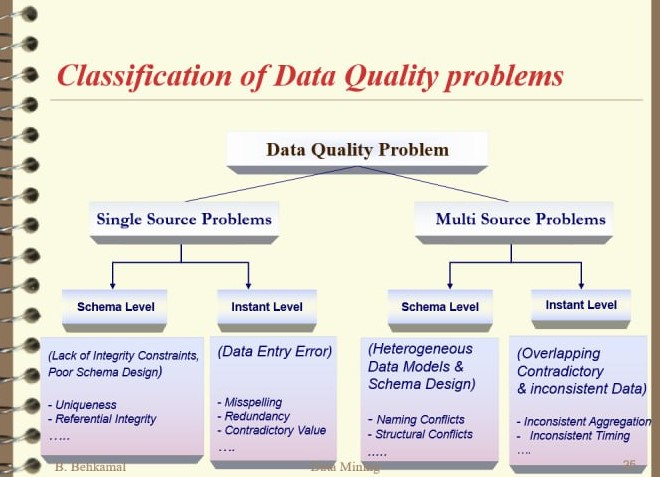

single instant level :
Misspelling value for continent
Misspelling value for Hemisphere
BMI > 105 is misspell

Multi source Schema level:
           Naming conflict between main dataset and continent dataset in Country column that we have in main dataset and nation in continent dataset and between Continent column and continent column

In [5]:

for index, row in df.iterrows():

    Continent = row['Continent']
    Country = row['Country']
    Hemisphere = row['Hemisphere']
    if Country == "United States" :
        # Multi source Schema level: Naming conflict
        Country = "US"
    if not (Hemisphere == "Southern Hemisphere" or Hemisphere == "Northern Hemisphere"):
        # Misspelling value for Hemisphere
        print(f"Misspelling value for Hemisphere with index {index}")
    if not (Continent == "South America" or Continent == "North America" or Continent == "Europe" or Continent == "Asia" or Continent == "Africa" or Continent == "Australia"):
        # Misspelling value for Continent
        print(f"Misspelling value for Hemisphere with index {index}")
    result = continentcsv[continentcsv['nation'] == Country]['continent'].values
    if len(result) > 0:
        if result != Continent:
            if result[0] == 'Oceania' and Continent=='Australia':
                # Multi source Schema level: Naming conflict
                 continue

            # Contradictory Data that have the same Country name but different Continent
            print(f"The continent for {Country} is: {result[0]} but in main csv writed as: {Continent}")
        if not ( (Continent == "South America" and Hemisphere == "Southern Hemisphere" ) or  (Continent == "North America" and Hemisphere == "Northern Hemisphere" ) or (Continent == "Europe" and Hemisphere == "Northern Hemisphere" ) or (Continent == "Asia"  and Hemisphere == "Northern Hemisphere" ) or (Continent == "Africa" and Hemisphere == "Southern Hemisphere" ) or (Continent == "Australia"  and Hemisphere == "Southern Hemisphere" ) ):
             # incorrect value for Hemisphere
             print(f"incorrect value for Hemisphere with index {index} with country {Country} and continent {Continent} and {Hemisphere}")
    else:
        # Country (main csv) is not in nation (continent csv)
        print(f"The Country {Country} does not exist in the continentcsv.")




Misspelling value for Hemisphere with index 10
The continent for South Africa is: Africa but in main csv writed as: a
incorrect value for Hemisphere with index 10 with country South Africa and continent a and Southern Hemisphere
incorrect value for Hemisphere with index 15 with country Italy and continent Europe and Southern Hemisphere
The Country B does not exist in the continentcsv.
incorrect value for Hemisphere with index 22 with country Spain and continent Europe and Southern Hemisphere
incorrect value for Hemisphere with index 25 with country Spain and continent Europe and Southern Hemisphere
incorrect value for Hemisphere with index 31 with country Spain and continent Europe and Southern Hemisphere
incorrect value for Hemisphere with index 32 with country Nigeria and continent Africa and Northern Hemisphere
incorrect value for Hemisphere with index 45 with country Italy and continent Europe and Southern Hemisphere
incorrect value for Hemisphere with index 52 with country Italy a

In [ ]:
for index, row in df.iterrows():
    Sex = row['Sex']
    patient = row['Patient ID']

    if Sex == "Male":
        Sex = "0"
    if Sex == "Female":
        Sex = "1"

    result = names[names['Patient ID'] == patient]['Gender'].values

    if len(result) > 0:
        if result[0] != Sex:
            print(f"The dataset names for sex is: {result[0]} but in the main csv written as: {Sex}")
    else:
        print(f"The patient ID {patient} does not exist in the names.csv")


The dataset names for sex is: 0 but in the main csv written as: 1
The dataset names for sex is: nan but in the main csv written as: nan
The dataset names for sex is: nan but in the main csv written as: nan
The dataset names for sex is: nan but in the main csv written as: nan
The patient ID OFE0541 does not exist in the names.csv
The patient ID YFE0882 does not exist in the names.csv


In [ ]:
import pandas as pd
from tabulate import tabulate

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# List of columns to check for missing values, uniqueness, and validation
columns_to_check = [
     'Age', 'BMI'
]

# Create a list to store the information for each column
column_info = []

# Iterate over columns and check for missing values, uniqueness, and validation
for column in columns_to_check:
    missing_rows = df[df[column].isnull()]
    duplicate_rows = df[df.duplicated(subset=[column], keep=False)]

    # accuracy checks for specific columns
    accuarcy_check = None
    if column == 'Age':
        accuarcy_check = df['Age'].apply(lambda x: 0 <= x <150  if pd.notna(x) else None)
    elif column == 'BMI':
        accuarcy_check = df['BMI'].apply(lambda x: 9 <= x <105  if pd.notna(x) else None)

    info = {
        'Column': column,
        'Missing Rows': missing_rows.head(),
        'Duplicate Rows': duplicate_rows.head(),
        'accuracy Check': accuarcy_check
    }
    column_info.append(info)

# Display the information about missing values, uniqueness, and validation in a table
for info in column_info:
    print(f"\nColumn '{info['Column']}':")

    # Format missing values
    # missing_values_table = tabulate(info['Missing Rows'], headers='keys', tablefmt='pretty')
    # print(f"Missing values located at:\n{missing_values_table if info['Missing Rows'].shape[0] else 'No missing values.'}")

    # Format duplicate values
    # duplicate_values_table = tabulate(info['Duplicate Rows'], headers='keys', tablefmt='pretty')
    # print(f"Duplicated values located at:\n{duplicate_values_table if info['Duplicate Rows'].shape[0] else 'No duplicated values.'}")

    # Format unaccurate check
    if info['accuracy Check'] is not None:
        unaccurate_rows = df[~info['accuracy Check'].fillna(False)]
        if not unaccurate_rows.empty:
            unaccurate_rows_table = tabulate(unaccurate_rows, headers='keys', tablefmt='pretty')
            print(f"unaccurate rows based on accuracy check:\n{unaccurate_rows_table}")
        else:
            print("All rows are vaccurate.")
    else:
        print("No accuracy check performed for this column.")


Column 'Age':
unaccurate rows based on accuracy check:
+-----+------------+-------+--------+-------------+----------------+------------+----------+----------------+---------+---------+---------------------+-------------------------+-----------+-------------------------+----------------+--------------+-------------------------+--------+-------------+---------------+---------------------------------+---------------------+-----------+---------------+---------------------+-------------------+
|     | Patient ID |  Age  |  Sex   | Cholesterol | Blood Pressure | Heart Rate | Diabetes | Family History | Smoking | Obesity | Alcohol Consumption | Exercise Hours Per Week |   Diet    | Previous Heart Problems | Medication Use | Stress Level | Sedentary Hours Per Day | Income |     BMI     | Triglycerides | Physical Activity Days Per Week | Sleep Hours Per Day |  Country  |   Continent   |     Hemisphere      | Heart Attack Risk |
+-----+------------+-------+--------+-------------+---------------

In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Check the number of unique values in each column
unique_value_counts = df.nunique()

# Filter columns with non-unique values
non_unique_columns = unique_value_counts[unique_value_counts < len(df)].index

# Display the columns with non-unique values
print("Columns with Non-Unique Values:")
print(non_unique_columns)


Columns with Non-Unique Values:
Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Income', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


برای بهبود کیفیت داده ستون قاره چون از کشور قابل استخراج است اضافه است.
و همچنین ستون نیم کره اضافه است پس حذف میکنیم.

رایheart rist attack به جای اینکه به صورت باینری خروجی را چاپ کنیم به صورت درصدی عدد را ثبت کنیم با این کار دقت مدل بالا میرود

اگر تعدا  سطر های دارای مقادیر خالی برای یک ستون خاص کم بود باید با مقادیر نزدیک به اون جایگزتری کنیم


مقادیر تکرار شده رو یک بار استفاده کنیم


داده ها ختما یک مدل باشند

دیتا معتبر و درست باشند سطر های دارای مقادیر اشتباه را حذف میکنیم

replacing the missing values(null) with mean or median

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Set the threshold for dropping columns with more than X null values
null_threshold = 100

# Identify columns with more than the threshold null values
columns_to_drop = df.columns[df.isnull().sum() > null_threshold]

# Drop columns with more than the threshold null values
df.drop(columns=columns_to_drop, inplace=True)

# Create a DataFrame to store information about the replaced values
replaced_values_info = pd.DataFrame(columns=['Column', 'Replaced Nulls', 'Replacement Value', 'Reason'])

# Iterate over columns and fill missing values with mean, mode, or median
for column in df.columns:
    if df[column].isnull().any():
        # Determine fill value based on data type
        fill_value = df[column].mean() if pd.api.types.is_numeric_dtype(df[column].dtype) else df[column].mode().iloc[0]

        # Fill missing values
        replaced_rows = df[df[column].isnull()]
        df[column].fillna(fill_value, inplace=True)

        # Store information about replaced values
        replaced_values_info = replaced_values_info.append({
            'Column': column,
            'Replaced Nulls': len(replaced_rows),
            'Replacement Value': fill_value,
            'Reason': 'Mean' if pd.api.types.is_numeric_dtype(df[column].dtype) else 'Mode'
        }, ignore_index=True)

# Display the updated dataset
print(df)

# Display information about replaced values
print("\nInformation about replaced values:")
print(replaced_values_info)


     Patient ID         Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0        kjreer   67.000000    Male        208.0         158/88        72.0   
1       CZE1114  230.000000    Male        389.0         165/93        98.0   
2       BNI9906   21.000000       x        324.0         174/99        72.0   
3       JLN3497   53.724803    Male        383.0        163/100        73.0   
4       ZOO7941   66.000000    Male        318.0          91/88        93.0   
...         ...         ...     ...          ...            ...         ...   
8758    MSV9918   60.000000    Male        121.0          94/76        61.0   
8759    QSV6764   28.000000  Female        120.0        157/102        73.0   
8760    XKA5925   47.000000    Male        250.0         161/75       105.0   
8761    EPE6801   36.000000    Male        178.0         119/67        60.0   
8762    ZWN9666   25.000000  Female        356.0         138/67        75.0   

      Diabetes  Family History  Smoking  Obesity  .

<ipython-input-6-5c1be78b11ff>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  replaced_values_info = replaced_values_info.append({
<ipython-input-6-5c1be78b11ff>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  replaced_values_info = replaced_values_info.append({
<ipython-input-6-5c1be78b11ff>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  replaced_values_info = replaced_values_info.append({
<ipython-input-6-5c1be78b11ff>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  replaced_values_info = replaced_values_info.append({


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Set the threshold for dropping columns with more than X percent null values
null_threshold_percent = 10

# Calculate the threshold in terms of the percentage of missing values
null_threshold = len(df) * (null_threshold_percent / 100)

# Identify columns with more than the threshold null values
columns_to_drop = df.columns[df.isnull().sum() > null_threshold]

# Drop columns with more than the threshold null values
df.drop(columns=columns_to_drop, inplace=True)

# Create a DataFrame to store information about the replaced values
replaced_values_info = pd.DataFrame(columns=['Column', 'Replaced Nulls', 'Replacement Value', 'Reason'])

# Iterate over columns and fill missing values with mean, mode, or median
for column in df.columns:
    if df[column].isnull().any():
        # Determine fill value based on data type
        fill_value = df[column].mean() if pd.api.types.is_numeric_dtype(df[column].dtype) else df[column].mode().iloc[0]

        # Fill missing values
        replaced_rows = df[df[column].isnull()]
        df[column].fillna(fill_value, inplace=True)

        # Store information about replaced values
        replaced_values_info = pd.concat([
            replaced_values_info,
            pd.DataFrame({
                'Column': [column],
                'Replaced Nulls': [len(replaced_rows)],
                'Replacement Value': [fill_value],
                'Reason': ['Mean' if pd.api.types.is_numeric_dtype(df[column].dtype) else 'Mode']
            })
        ], ignore_index=True)

# Display the updated dataset
print(df)

# Display information about replaced values
print("\nInformation about replaced values:")
print(replaced_values_info)


     Patient ID         Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0        kjreer   67.000000    Male        208.0         158/88        72.0   
1       CZE1114  230.000000    Male        389.0         165/93        98.0   
2       BNI9906   21.000000       x        324.0         174/99        72.0   
3       JLN3497   53.724803    Male        383.0        163/100        73.0   
4       ZOO7941   66.000000    Male        318.0          91/88        93.0   
...         ...         ...     ...          ...            ...         ...   
8758    MSV9918   60.000000    Male        121.0          94/76        61.0   
8759    QSV6764   28.000000  Female        120.0        157/102        73.0   
8760    XKA5925   47.000000    Male        250.0         161/75       105.0   
8761    EPE6801   36.000000    Male        178.0         119/67        60.0   
8762    ZWN9666   25.000000  Female        356.0         138/67        75.0   

      Diabetes  Family History  Smoking  Obesity  .

normalizing datset

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Set the threshold for dropping columns with more than X percent null values
null_threshold_percent = 10

# Calculate the threshold in terms of the percentage of missing values
null_threshold = len(df) * (null_threshold_percent / 100)

# Identify columns with more than the threshold null values
columns_to_drop = df.columns[df.isnull().sum() > null_threshold]

# Drop columns with more than the threshold null values
df.drop(columns=columns_to_drop, inplace=True)

# Create a DataFrame to store information about the replaced values
replaced_values_info = pd.DataFrame(columns=['Column', 'Replaced Nulls', 'Replacement Value', 'Reason'])

# Create a list to store the names of numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Normalize numeric columns using Min-Max scaling
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Iterate over columns and fill missing values with mean, mode, or median
for column in df.columns:
    if df[column].isnull().any():
        # Determine fill value based on data type
        fill_value = df[column].mean() if pd.api.types.is_numeric_dtype(df[column].dtype) else df[column].mode().iloc[0]

        # Fill missing values
        replaced_rows = df[df[column].isnull()]
        df[column].fillna(fill_value, inplace=True)

        # Store information about replaced values
        replaced_values_info = pd.concat([
            replaced_values_info,
            pd.DataFrame({
                'Column': [column],
                'Replaced Nulls': [len(replaced_rows)],
                'Replacement Value': [fill_value],
                'Reason': ['Mean' if pd.api.types.is_numeric_dtype(df[column].dtype) else 'Mode']
            })
        ], ignore_index=True)

# Display the normalized and updated dataset
print(df)

# Display information about replaced values
print("\nInformation about replaced values:")
print(replaced_values_info)


     Patient ID       Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0        kjreer  0.231132    Male     0.314286         158/88    0.457143   
1       CZE1114  1.000000    Male     0.960714         165/93    0.828571   
2       BNI9906  0.014151       x     0.728571         174/99    0.457143   
3       JLN3497  0.168513    Male     0.939286        163/100    0.471429   
4       ZOO7941  0.226415    Male     0.707143          91/88    0.757143   
...         ...       ...     ...          ...            ...         ...   
8758    MSV9918  0.198113    Male     0.003571          94/76    0.300000   
8759    QSV6764  0.047170  Female     0.000000        157/102    0.471429   
8760    XKA5925  0.136792    Male     0.464286         161/75    0.928571   
8761    EPE6801  0.084906    Male     0.207143         119/67    0.285714   
8762    ZWN9666  0.033019  Female     0.842857         138/67    0.500000   

      Diabetes  Family History  Smoking  Obesity  ...  \
0          0.0    

predicting new values and adding a new column based on the other columns


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Select relevant features
selected_features = ['Age', 'Exercise Hours Per Week', 'Physical Activity Days Per Week', 'Stress Level']

# Drop rows with missing values in selected features
df_selected = df[selected_features + ['Heart Attack Risk']].dropna()

# Define criteria for a healthy lifestyle (you can adjust these criteria)
healthy_criteria = ((df_selected['Age'] < 40) &
                    (df_selected['Exercise Hours Per Week'] >= 3) &
                    (df_selected['Physical Activity Days Per Week'] >= 4) &
                    (df_selected['Stress Level'] <= 3))

# Add a column indicating whether the person is living a healthy life
df_selected['Healthy Lifestyle'] = healthy_criteria.astype(int)

# Split the dataset into features and target
X = df_selected[selected_features]
y = df_selected['Healthy Lifestyle']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Use the index to merge 'Healthy Lifestyle' back to the original dataset
df = pd.merge(df, df_selected[['Healthy Lifestyle']], left_index=True, right_index=True, how='left')

# Display the updated dataset
print(df.head())


Accuracy: 0.9994295493439818
  Patient ID    Age   Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0     kjreer   67.0  Male        208.0         158/88        72.0         0   
1    CZE1114  230.0  Male        389.0         165/93        98.0         1   
2    BNI9906   21.0     x        324.0         174/99        72.0         1   
3    JLN3497    NaN  Male        383.0        163/100        73.0         1   
4    ZOO7941   66.0  Male        318.0          91/88        93.0         1   

   Family History  Smoking  Obesity  ...  Income        BMI Triglycerides  \
0               0        1        0  ...  261404  31.251233           286   
1               1        1        1  ...  285768  27.194973           235   
2               0        0        0  ...  235282  28.176571           587   
3               1        1        0  ...  125640  36.464704           378   
4               1        1        1  ...  160555  21.809144           231   

   Physical Activity Days Per Wee

outliers

In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include='number').columns

# Create an empty DataFrame to store information about outliers
outliers_info = pd.DataFrame(columns=['Column', 'Lower Bound', 'Upper Bound', 'Outliers'])

# Set the threshold for identifying outliers
outlier_threshold = 1.5

# Iterate over numeric columns and identify outliers using IQR method
for column in numeric_columns:
    # Calculate IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = max(Q1 - outlier_threshold * IQR, df[column].min())
    upper_bound = min(Q3 + outlier_threshold * IQR, df[column].max())

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    # Append information to the outliers_info DataFrame
    outliers_info = pd.concat([outliers_info, pd.DataFrame({
        'Column': column,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': [outliers.tolist()]
    })], ignore_index=True)

# Display information about outliers
print(outliers_info)


                             Column   Lower Bound    Upper Bound  \
0                               Age     18.000000     127.500000   
1                       Cholesterol    120.000000     400.000000   
2                        Heart Rate     40.000000     110.000000   
3                          Diabetes      0.000000       1.000000   
4                    Family History      0.000000       1.000000   
5                           Smoking      1.000000       1.000000   
6                           Obesity      0.000000       1.000000   
7               Alcohol Consumption      0.000000       1.000000   
8           Exercise Hours Per Week      0.002442      19.998709   
9           Previous Heart Problems      0.000000       1.000000   
10                   Medication Use      0.000000       1.000000   
11                     Stress Level      1.000000      10.000000   
12          Sedentary Hours Per Day      0.001263      11.999313   
13                           Income  20062.00000

Stemming and lemmitazation

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk import PorterStemmer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Assuming you have a DataFrame named df with a 'Country' column
# df = pd.DataFrame({'Country': ['example text 1', 'example text 2', ...]})

# Function to preprocess text in a DataFrame column
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    # Stemming
    stems = [PorterStemmer().stem(token) for token in tokens]
    # Lemmatization
    lemmas = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    return {
        'Original Tokens': tokens,
        'Stems': stems,
        'Lemmas': lemmas,
        'Filtered Tokens': filtered_tokens
    }

# Apply the preprocessing function to the 'Country' column
preprocessed_data = df['Country'].apply(preprocess_text)

# Create new columns in the DataFrame for each preprocessed result
df['Stems'] = preprocessed_data.apply(lambda x: x['Stems'])
df['Lemmas'] = preprocessed_data.apply(lambda x: x['Lemmas'])
df['Filtered Tokens'] = preprocessed_data.apply(lambda x: x['Filtered Tokens'])

# Print the updated DataFrame
print(df)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  Triglycerides  \
0            0               0        1        0  ...          

In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Select numeric columns for outlier detection
numeric_columns = df.select_dtypes(include='number').columns

# Set the threshold for identifying outliers
outlier_threshold = 1.5

# Iterate over numeric columns and remove outliers using IQR method
for column in numeric_columns:
    # Calculate IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = max(Q1 - outlier_threshold * IQR, df[column].min())
    upper_bound = min(Q3 + outlier_threshold * IQR, df[column].max())
    print(lower_bound)
    # Remove outliers from the dataset
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Display the updated dataset without outliers
print(df)


18.0
120.0
40.0
0
0
1.0
0
0
0.002442348
0
0
1
0.001263206
20062
18.00233658
30
0
4
0
     Patient ID   Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0        kjreer  67.0    Male        208.0         158/88        72.0   
4       ZOO7941  66.0    Male        318.0          91/88        93.0   
5       ZOO7941  54.0  Female        297.0         172/86        48.0   
6       WYV0966  90.0    Male        358.0         102/73        84.0   
7       XXM0972  84.0    Male        220.0         131/68       107.0   
...         ...   ...     ...          ...            ...         ...   
8756    BUE0416  22.0    Male        347.0         115/87       108.0   
8757    YDX2478  59.0  Female        378.0          93/78        99.0   
8758    MSV9918  60.0    Male        121.0          94/76        61.0   
8760    XKA5925  47.0    Male        250.0         161/75       105.0   
8761    EPE6801  36.0    Male        178.0         119/67        60.0   

      Diabetes  Family History  Smokin

data reduction

In [ ]:
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Columns to keep for data reduction
columns_for_reduction = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
                          'Diabetes', 'Family History', 'Smoking', 'Obesity',
                          'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
                          'Previous Heart Problems', 'Medication Use', 'Stress Level',
                          'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
                          'Physical Activity Days Per Week', 'Sleep Hours Per Day']

# Create a reduced dataset with only the selected columns
reduced_df = df[columns_for_reduction]

fraction_to_keep = 0.5  # Adjust this fraction based on your desired data reduction

# Use the sample method to randomly select a fraction of the dataset
reduced_df = df.sample(frac=fraction_to_keep, replace=False, random_state=42)

# Display the reduced dataset

# Display the reduced dataset
print(reduced_df.head())
print(reduced_df.shape())


     Patient ID   Age   Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
1226    BPY8954  65.0  Male        340.0         124/68        75.0         0   
7903    TBS9300  77.0  Male        361.0        177/104        46.0         1   
1559    MPM7379  70.0  Male        341.0         156/84        73.0         1   
3621    AFI9143  47.0  Male        392.0         155/75        72.0         0   
7552    FEW6960  63.0  Male        173.0        103/109        98.0         0   

      Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
1226               0        1        1  ...                 5.567363  216664   
7903               0        1        0  ...                 9.964626  221778   
1559               1        1        1  ...                 9.151772  197984   
3621               1        1        1  ...                 8.435153   88566   
7552               0        1        0  ...                 8.841575  148437   

            BMI  Triglycerides  

visualization


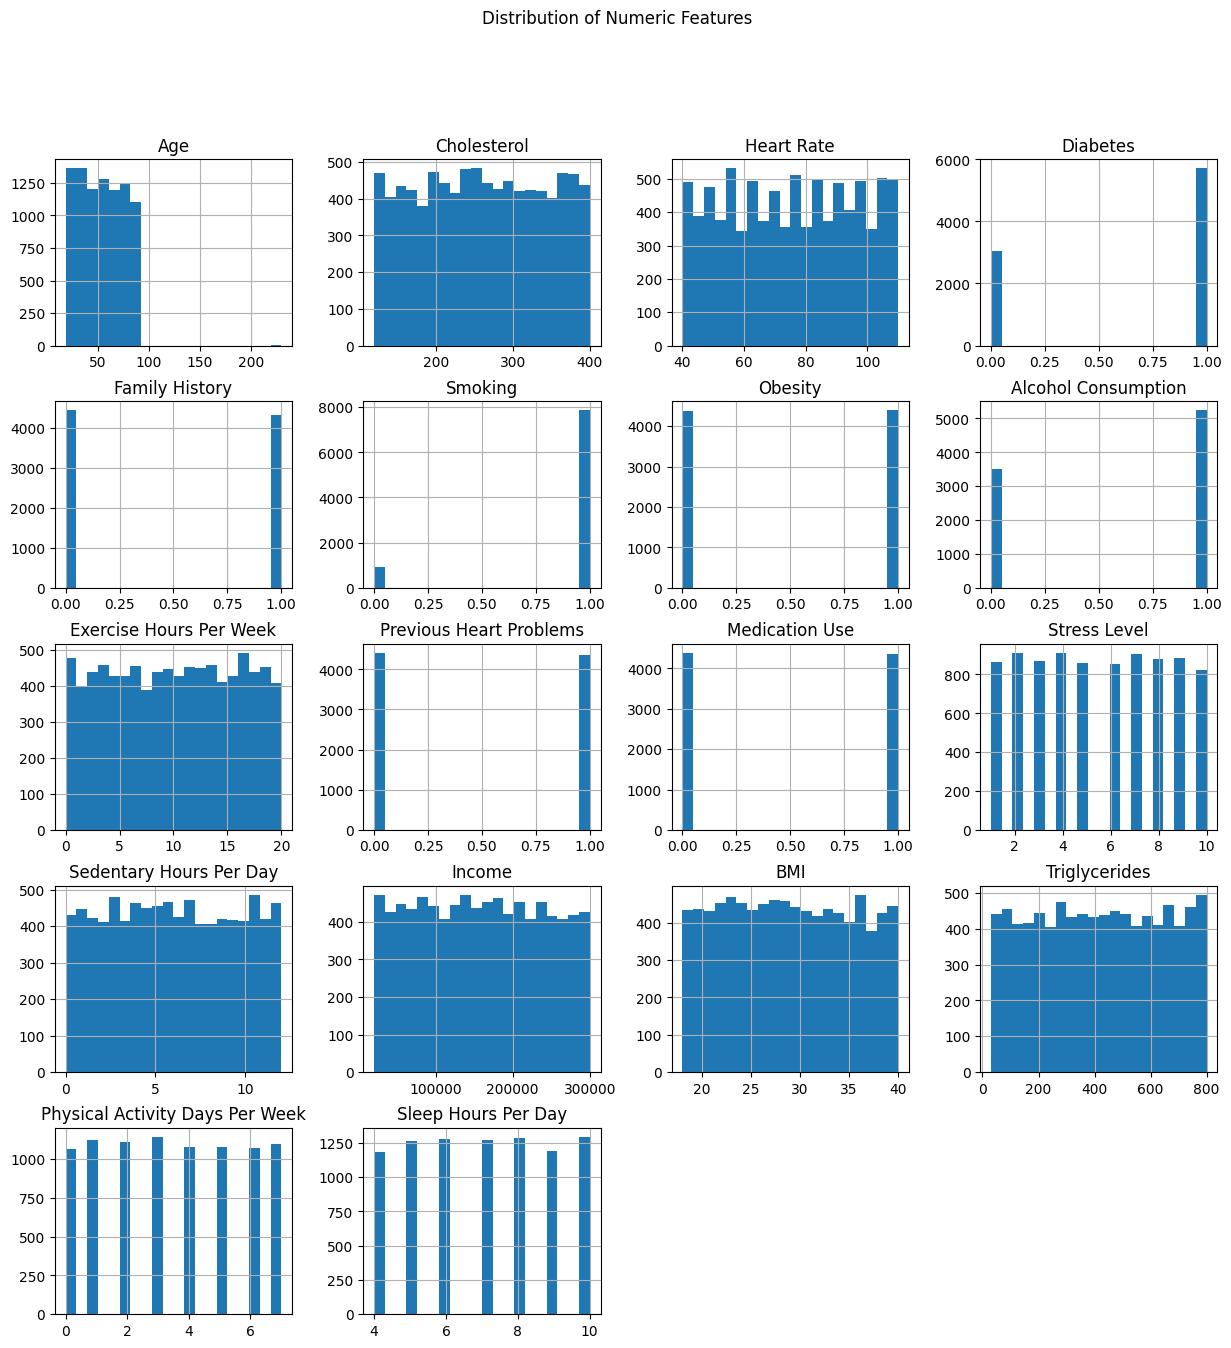

<ipython-input-54-d885c2ab335b>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[columns_to_visualize].corr()


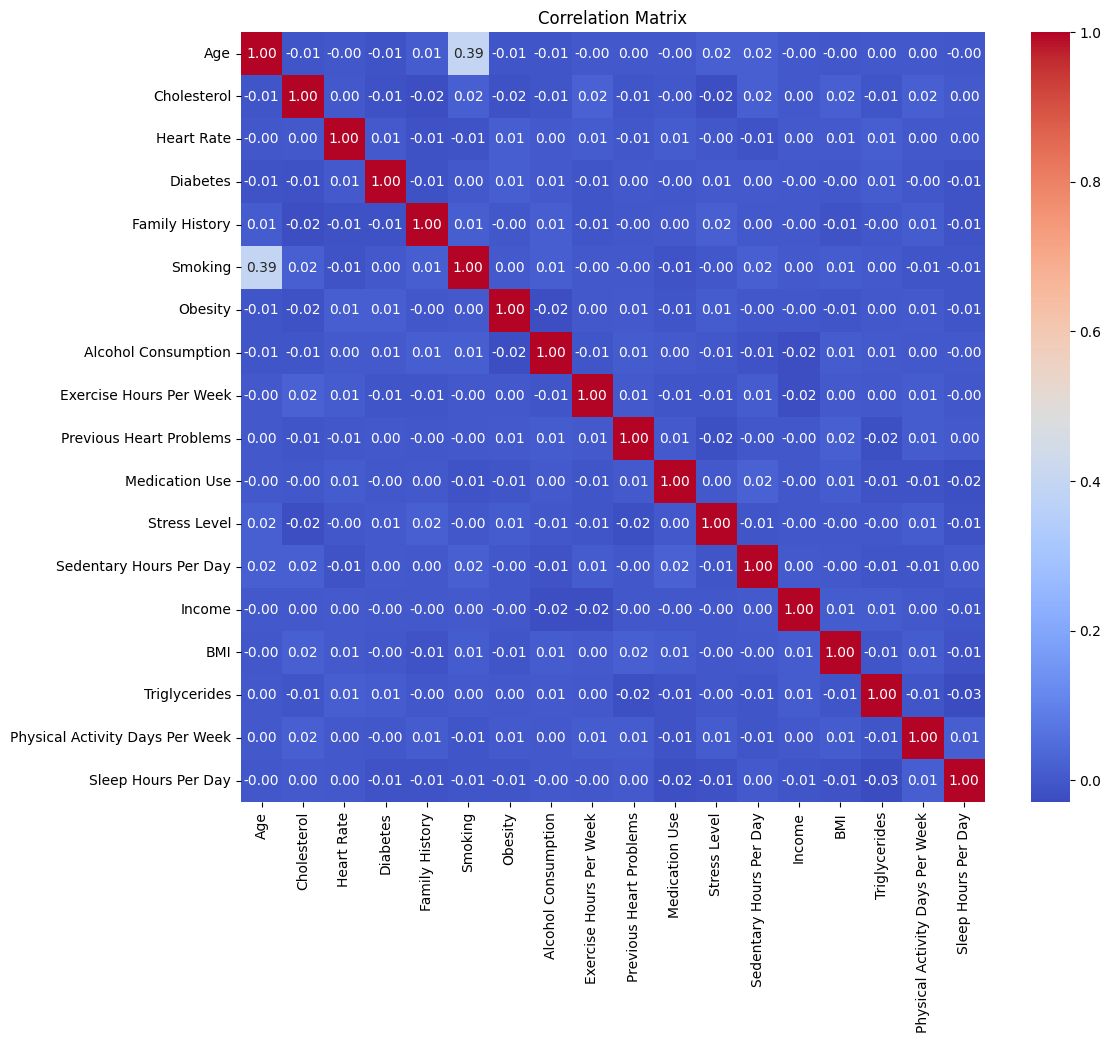

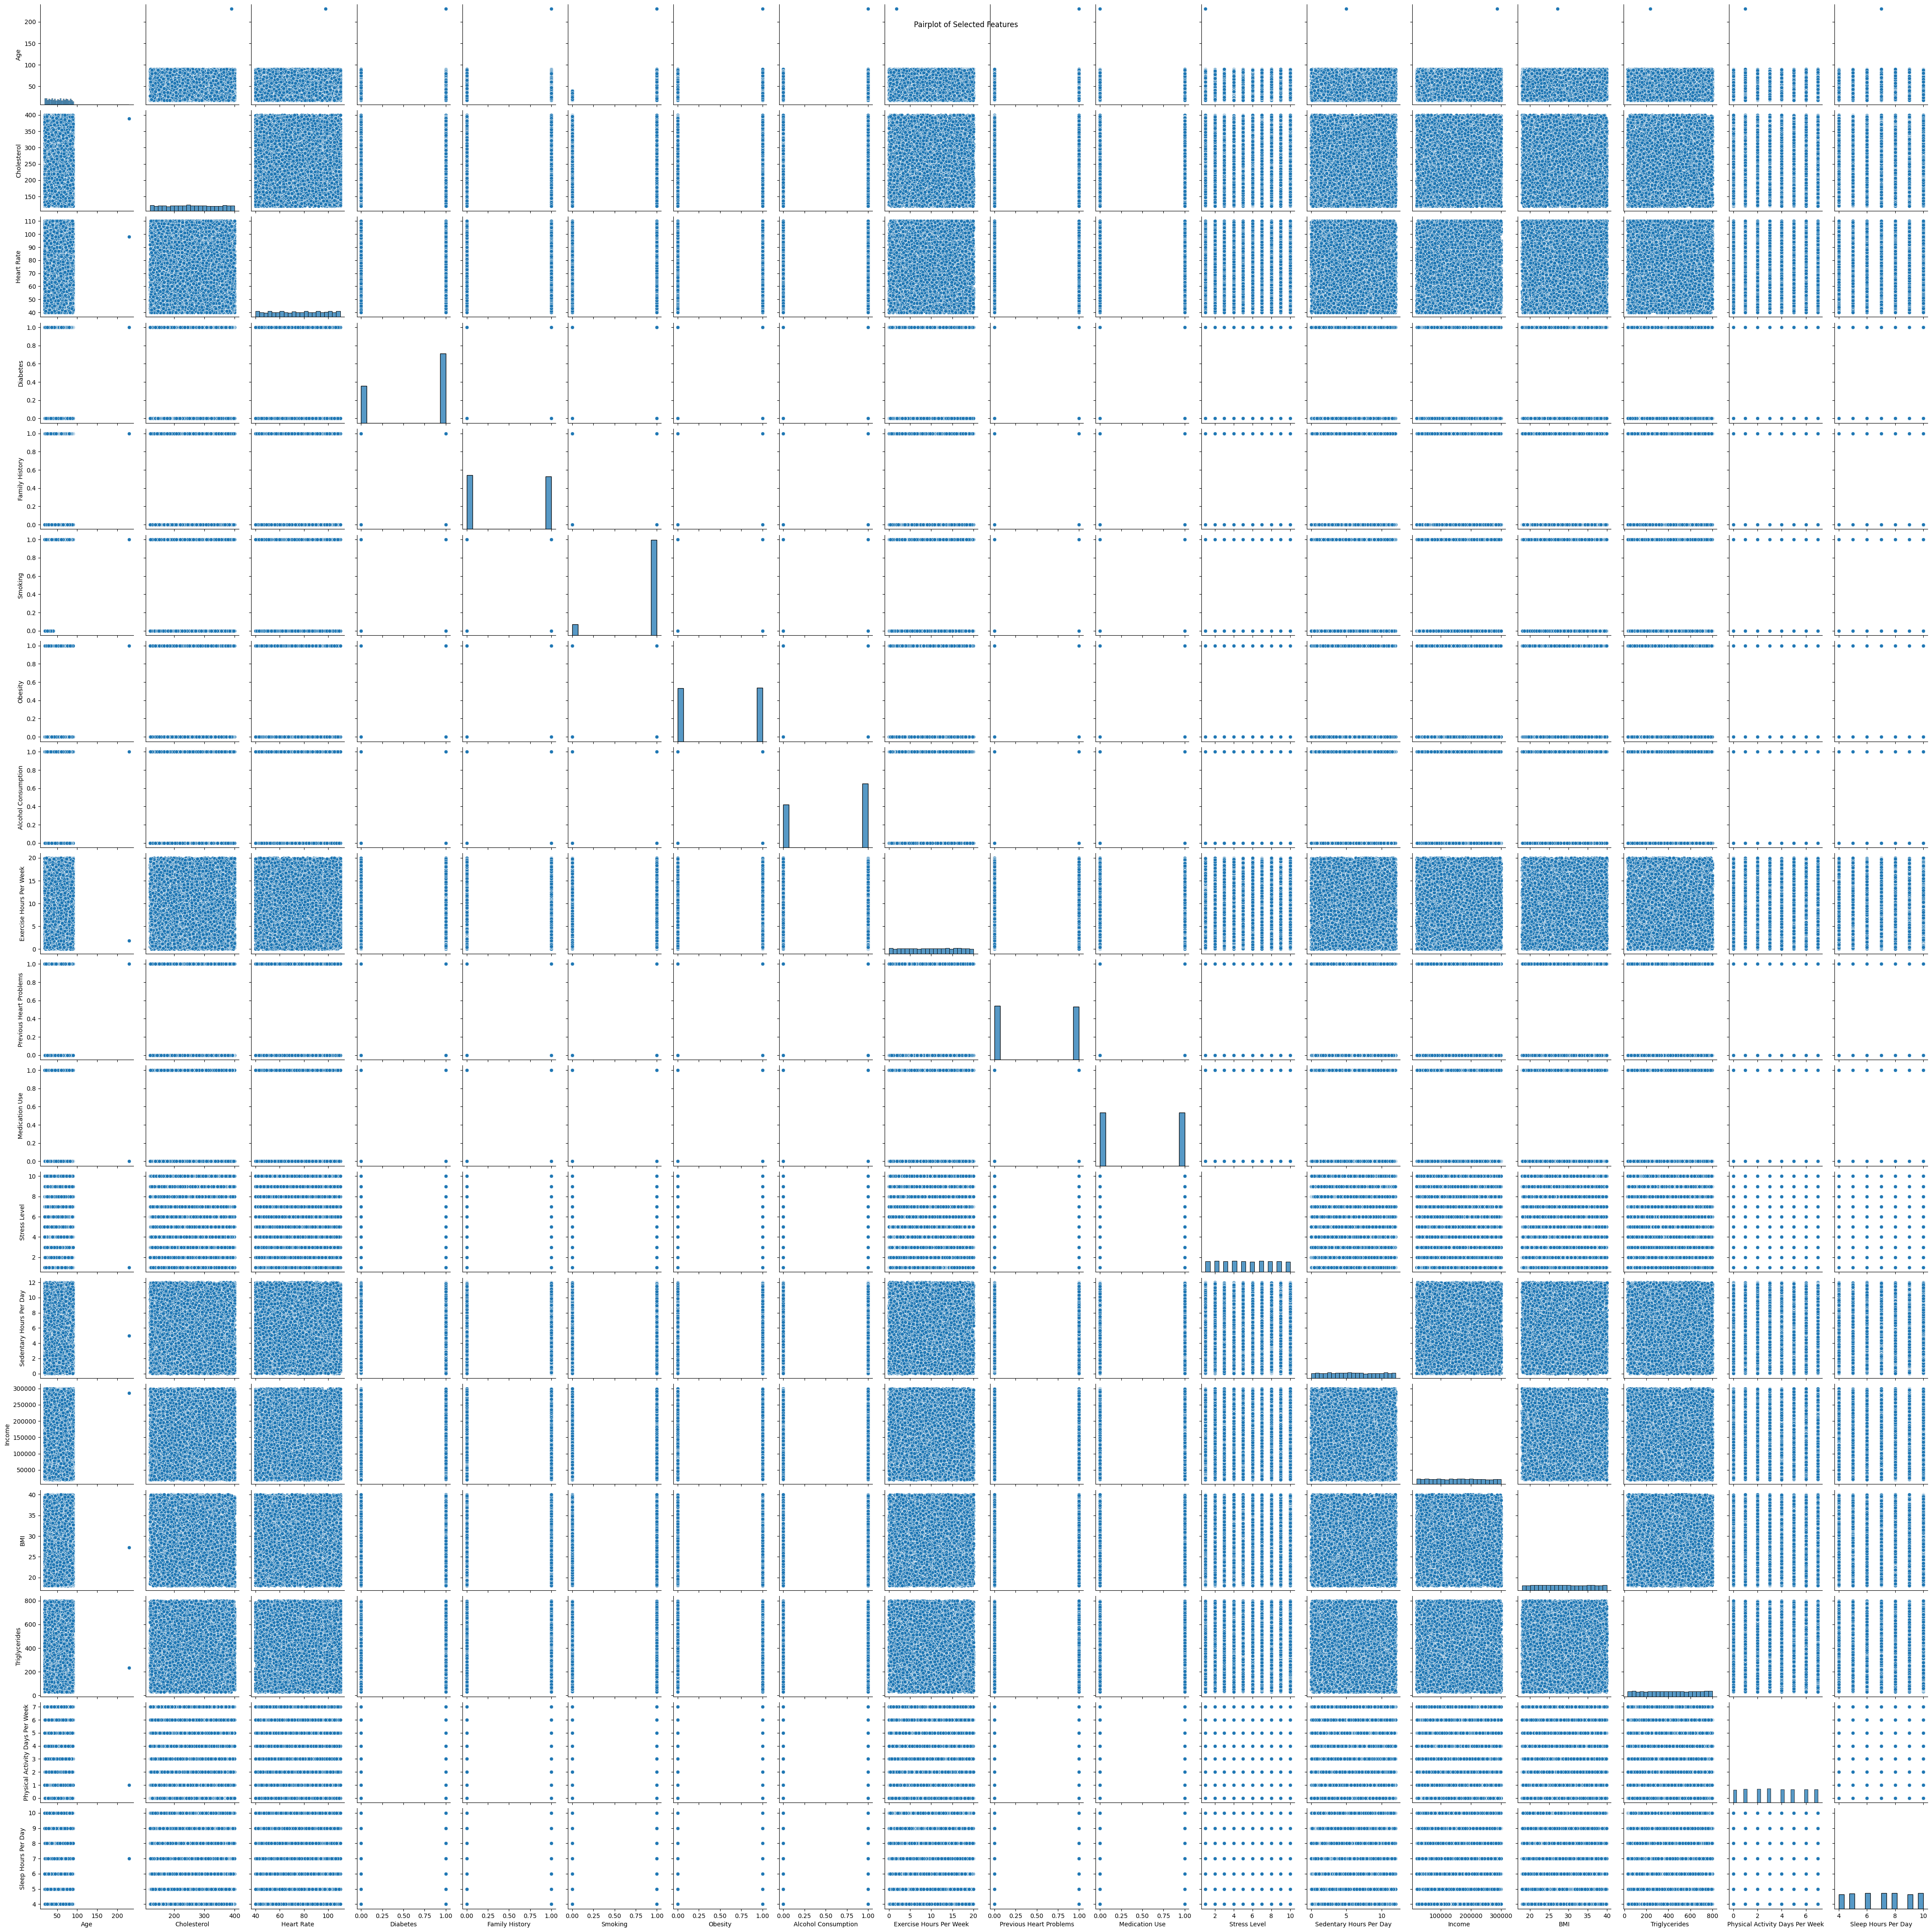

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
# Replace '/path/to/your/dataset.csv' with the actual path to your dataset
dataset_path = '/content/heart_attack_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Columns to visualize
columns_to_visualize = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
                         'Diabetes', 'Family History', 'Smoking', 'Obesity',
                         'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
                         'Previous Heart Problems', 'Medication Use', 'Stress Level',
                         'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
                         'Physical Activity Days Per Week', 'Sleep Hours Per Day']

# Plot distributions for numeric features
df[columns_to_visualize].hist(bins=20, figsize=(15, 15))
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Plot heatmap for correlation matrix
correlation_matrix = df[columns_to_visualize].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
sns.pairplot(df[columns_to_visualize])
plt.suptitle('Pairplot of Selected Features')
plt.show()
